# **AM 207**: Homework 1

Verena Kaynig-Fittkau and Pavlos Protopapas  <br>
**Due: 11.59 P.M. Thursday February 18th, 2015**

### Instructions:

+ Upload your answers in an ipython notebook to Canvas.

+ We will provide you imports for your ipython notebook. Please do not import additional libraries.

+ Your individual submissions should use the following filenames: AM207_YOURNAME_HW1.ipynb

+ Your code should be in code cells as part of your ipython notebook. Do not use a different language (or format). 

+ **Do not just send your code. The homework solutions should be in a report style. Be sure to add comments to your code as well as markdown cells where you describe your approach and discuss your results. **

+ Please submit your notebook in an **executed** status, so that we can see all the results you computed. However, we will still run your code and all cells should reproduce the output when executed. 

+ If you have multiple files (e.g. you've added code files or images) create a tarball for all files in a single file and name it: AM207_YOURNAME_HW1.tar.gz or AM207_YOURNAME_HW1.zip


### Have Fun!
_ _ _ _ _

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time

import scipy.stats 

# Problem 1: By a Needles Length

![Alt Buffon Needle](figures/Buffon_needle.gif)
We discussed how to use Buffon's needle to estimate $\pi$ during lecture, using the probability of the needle crossing a line of a floor tile. Using Monte Carlo simulation, estimate the probability of the needle crossing a floor line as a function of the needle's length. Assume that the distance between floor lines is 1 unit, and your needle manufacturer provides you with needles of different length in 0.1 increments with a maximum length of 1 unit. Plot a histogram of your results and compare your results to the analytical solution from the lecture:
$$P = \frac{2 \cdot l}{t \cdot \pi}$$

where $l$ is the length of the needle and $t$ is the distance beweent the floor tiles

In a next step extend your simulation to a maximum needle length of 2 units, still using 0.1 increments. Compare your results to the same formula for the intersection. Why do your results now diverge from the analytical solution given above? What would you need to do to correct the analytical formula? It is ok to just describe the integral you need to solve analytically, and why it looks this way. No need to actually do the integration by hand. 

**Please answer this problem by adding cells here.**

In [130]:
# =================================
# number of samples
# =================================
N_total = 10000.0 

# =================================
# number of trials
# =================================
N_trials = 1000

In [160]:
# =================================
# length of the needle [0.1, 0.2, ..., 2.0]
# =================================
needles_length = np.arange(0.1, 2.1, 0.1)

# =================================
# lists for saving data
# =================================
plot_p_list = []
std_list = []
actual_p_list = []


for needle in needles_length:
    tmp_p_list = []
    for i in range(N_trials):
        # =================================
        # drawing random points uniform
        # 1) x : distance of the needle center to the closest line [0, 1/2 unit]
        # 2) theta : acute angle of the needle and the closest line [0, pi/2]
        # =================================
        x = np.random.uniform(low=0, high=1./2, size=N_total)
        theta = np.random.uniform(low=0, high=np.pi/2, size=N_total)


        # =================================
        # needle intersects the line if l/2 >= x/sin(theta),
        # therefore we can only compare l >= (2x)/sin(theta)
        # =================================
        distance = 2*x/np.sin(theta)

        
        # =================================
        # check if the needles intersect the line
        # =================================
        does_intersect = distance<=needle
        N_intersect = np.sum(does_intersect)
        p_of_intersect = N_intersect/N_total
        tmp_p_list.append(p_of_intersect)

    # =================================
    # Get MEAN & STD to plot
    # =================================
    plot_p_list.append(np.mean(tmp_p_list))
    std_list.append(np.std(tmp_p_list))
    
    # =================================
    # Analytical solution P
    # =================================
    actual_p_list.append(2*needle/np.pi)

/Users/Grace/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Grace/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


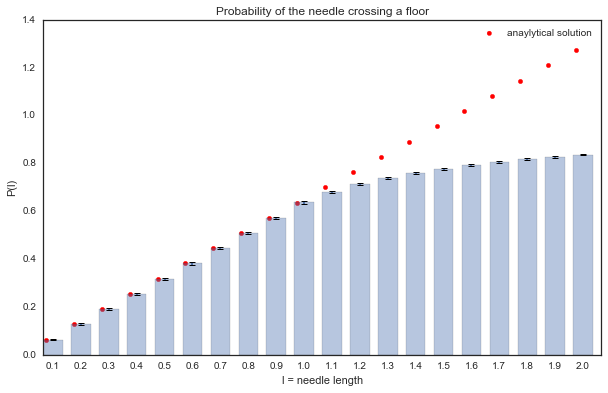

In [165]:
# =================================
# Plot
# =================================
bar_width = 0.07
opacity = 0.4
error_config = {'ecolor': '0.3'}
fig = plt.figure(figsize=(10, 6))

plt.bar(needles_length, plot_p_list, bar_width, alpha=opacity, yerr=std_list, error_kw=error_config)
plt.scatter(needles_length+0.01, actual_p_list, color='red', label='anaylytical solution')
(_, caps, _) = plt.errorbar(needles_length+bar_width/2.0, plot_p_list, yerr=std_list, linestyle="None")

for cap in caps:
    cap.set_color('black')
    cap.set_markeredgewidth(1)


plt.ylim(0, 1.4)
plt.xlim(0.1, 2.1)
plt.legend()
plt.xlabel("l = needle length")
plt.ylabel("P(l)")
plt.title('Probability of the needle crossing a floor')
plt.xticks(needles_length+bar_width/2.0, needles_length)
plt.show()

#### Q. Why do your results now diverge from the analytical solution given above? What would you need to do to correct the analytical formula? It is ok to just describe the integral you need to solve analytically, and why it looks this way. No need to actually do the integration by hand. 

Because the analytical solution $P = \frac{2 \cdot l}{t \cdot \pi}$ was derived with the assumption that $l < t $, so we could take integral over $x$ from 0 to $\frac{l}{2}sin(\theta)$ as $\frac{l}{2}sin(\theta) < \frac{t}{2}$ . To correct the formula, we need to change the integral range of x based on $l$ value. Therefore, if $\frac{l}{2}sin(\theta) < \frac{t}{2}$ then we take integral from 0 to $\frac{l}{2}sin(\theta)$, otherwise take integral from 0 to $\frac{t}{2}$.
$$P = \int_{\theta = 0}^\frac{\pi}{2} \int_{x = 0}^{minimum(\frac{l}{2}sin(\theta), \frac{t}{2})} \frac{4}{t \cdot \pi} \,dx \,d\theta$$

# Problem 2: Simple Integration

Write a function that estimates the value of a given one dimensional integral Monte Carlo style. 
The function should have the following signature:

`estimate_integral_MC(function_to_integrate, lower_bound, upper_bound, number_of_samples, number_of_tries)`

Where `number_of_tries` is used to calculate the standard deviation of the estimated value of the integral. 

Test your function by solving the following integrals:

* $ \int_0^3 x^{\frac{x}{4}} \,dx$
* $ \int_0^1 \log x \cdot \log(1-x) \,dx $.


**Please answer this problem by adding cells here.**

In [ ]:
# define f(x) for our integral
def f(x):
    return x**2 + 4*x*np.sin(x) 

# and the anti-derivative for testing
def anti_derivative_f(x): 
    return x**3/3.0+4.0*np.sin(x) - 4.0*x*np.cos(x) 

In [ ]:
# upper and lower limits:
a = 2;    
b = 3; 

# use N draws 
N= 10000.0

#1. N values uniformly drawn from a to b 
X = np.random.uniform(low=a, high=b, size=N) 

#2. Compute f(X)
Y = f(X)   
# and the average
f_average = np.sum(Y)/ N

#3. estimate value of integral
estimate = (b-a) * f_average;

#we compute the exact value for testing
exact_val = anti_derivative_f(b) - anti_derivative_f(a)

print "Monte Carlo estimate = ",estimate
print "Exact value = ", exact_val


# Problem 3: The Donut Estimation

You bought a nice donut for yourself and decided to eat it in the evening while working on your AM207 assignments. 
Unfortunately you live in a shared apartment and your roommate got hold of the donut in the kitchen. It seems that he first
cut off a small piece from the bottom, but then discovered how delicious the donut was and proceeded to cut off an additional large part. Discovering the donut theft in the evening you decide to confront your roommate, but you want to present hard facts and estimate how much of your original donut was left. 

Think of the donut as a 3D object(refer to the following picture). You model the donut as a torus centered at the origin`(0,0,0)` with outer radius `R=4` and inner radius `r=2`. Points $(x,y,z)$ inside the torus then are described by the following condition: 
$$z^2 + (\sqrt{x^2 + y^2} - c)^2 \leq a^2,$$
where $c$ is the radius from origin to the center of the torus tube, and $a$ is the radius of the donut tube, the cross section of the donut tube is a circle.

Your roomates cuts were first parallel to the x axis at y = -3, and then parallel to the y axis at x = 1.

To estimate the weight of the donut you need to solve the integral

$$ \int_V \rho \,dx \,dy \,dz $$.

Where $\rho$ is the density of the donut and $V$ is the volume. As you are just interested in the percentage of the whole donut you got to eat, you can just assume $\rho=1$.

The weight of the whole original donut then was:

$$ (\pi a^2)\cdot(2 \cdot \pi \cdot c) $$

What is the percentage of the donut your room mate left for you to eat? Don't forget to estimate the error as well!




**Please answer this problem by adding cells here.**

# Problem 4: New Years Resolutions

A lot of people pledge to get more active in the new year. Unfortunately these resolutions often are short lived. We model the probability distribution of personal fitness over the months of a year with a skewed distribution:

$ P(t) = \lambda \frac{(t-0.9)}{(t-1)^2 + 1}, \; 1 \leq t \leq 12 $

$ P(t) = 0 \; otherwise$

Where $t=1$ corresponds to January, $t=2$ corresponds to February, etc.. $\lambda$ is a normalization constant, and t is measured in months ($t$ only takes integer values). 

* Plot the given distribution and compute the normalization factor
* Sample $10^5$ samples from the distribution given above using rejection sampling. 
* Plot the histogram of the simulated samples and compare it to the true distribution (hint: It's easiest to use the normalization factor computed above and then plot the normed version of the histogram against it.
* Repeat the first two steps using the inverse transform instead of rejection sampling. Do not bother with getting the anti-derivative analytically. Just build a lookup table for it. 
* Compare the execution time of both methods. Which one is faster and why? When would you prefer a lookup table and when an analytical solution to the anti-derivative?

**Please answer this problem by adding cells here.**

# Problem 5: Give it all!

Estimate the following integral:

$ \int_{-1}^{1} \int_{-1}^{1}  f(x,y) \,dx \,dy$, with 

$ g(x,y) = -(x+0.4)^2 - (y+0.4)^2 + 0.1 - (x-0.4)^2 - (y-0.4)^2 + 0.05$, and

$ f(x,y) = \max(g(x,y), 0)$


First use basic Monte Carlo estimation. Then apply different variance reduction techniques we discussed in the lecture: 
* stratified sampling, 
* control variates, 
* importance sampling

For each technique give a short explanation of how you are applying it to the problem. Implement the different techniques and then make a table and compare the results with respect to run-time and error in the estimate. 

You can choose to also either apply and explain antithetic variates, or explain why you don't think they are useful in this case, and how they could benefit of being combined with one of the techniques listed above. 

**Please answer this problem by adding cells here.**